# 📈 Nvidia Stock Price Prediction Project

A full pipeline Machine Learning project:  
From **data processing ➡️ model training ➡️ web deployment** with **Flask**.

---

## 🛠 Project Overview
- Predict **next day's Nvidia stock price** using historical features
- Apply **Linear Regression**
- Build a **Flask web app** for user-friendly prediction




---

# 🚀 Step 1: Import Required Libraries


In [ ]:

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Deployment
import pickle


# 📥 Step 2: Load and Explore the Dataset

In this step, we load the Nvidia stock price dataset and perform initial exploration to understand its structure.

---

## 🔹 2.1 Load the dataset

In [2]:
df = pd.read_csv('NVDA.csv')


## Display the first few rows

In [29]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day
0,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000,1999,1,22
1,0.041556,0.045313,0.045833,0.041016,0.044271,510480000,1999,1,25
2,0.038331,0.041797,0.046745,0.041146,0.045833,343200000,1999,1,26
3,0.038212,0.041667,0.042969,0.039583,0.041927,244368000,1999,1,27
4,0.038092,0.041536,0.041927,0.041276,0.041667,227520000,1999,1,28


## Check basic information about the dataset

In [30]:
# Check data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  6558 non-null   float64
 1   Close      6558 non-null   float64
 2   High       6558 non-null   float64
 3   Low        6558 non-null   float64
 4   Open       6558 non-null   float64
 5   Volume     6558 non-null   int64  
 6   Year       6558 non-null   int32  
 7   Month      6558 non-null   int32  
 8   Day        6558 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 384.4 KB


## Summary statistics

In [31]:
df.describe()


,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03,6558.000000,6558.000000,6558.000000
mean,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08,2011.588137,6.531412,15.735133
std,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08,7.522835,3.431835,8.759534
min,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07,1999.000000,1.000000,1.000000
25%,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08,2005.000000,4.000000,8.000000
50%,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08,2012.000000,7.000000,16.000000
75%,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08,2018.000000,10.000000,23.000000
max,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09,2025.000000,12.000000,31.000000


## Working With Date Column

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      1999-01-22
1      1999-01-25
2      1999-01-26
3      1999-01-27
4      1999-01-28
          ...    
6553   2025-02-10
6554   2025-02-11
6555   2025-02-12
6556   2025-02-13
6557   2025-02-14
Name: Date, Length: 6558, dtype: datetime64[ns]

In [4]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [5]:
df.drop('Date',axis=1, inplace=True)

## Asking Questions 

In [7]:
# Checking the Shape of the DataFrame
df.shape

(6558, 9)

In [9]:
df.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Year         0
Month        0
Day          0
dtype: int64

In [10]:
# Checkinng Duplicates 
df.duplicated().sum()

np.int64(0)

## Checking Correlation

In [12]:
corr = df.corr()

corr


,Adj Close,Close,High,Low,Open,Volume,Year,Month,Day
Adj Close,1.000000,1.000000,0.999799,0.999861,0.999613,-0.164438,0.534762,0.026951,0.000057
Close,1.000000,1.000000,0.999799,0.999861,0.999613,-0.164415,0.534931,0.026950,0.000059
High,0.999799,0.999799,1.000000,0.999803,0.999881,-0.163423,0.534766,0.026691,0.000359
Low,0.999861,0.999861,0.999803,1.000000,0.999797,-0.165182,0.534976,0.027669,0.000294
Open,0.999613,0.999613,0.999881,0.999797,1.000000,-0.164090,0.534561,0.027277,0.000702
Volume,-0.164438,-0.164415,-0.163423,-0.165182,-0.164090,1.000000,-0.282276,-0.073432,-0.042757
Year,0.534762,0.534931,0.534766,0.534976,0.534561,-0.282276,1.000000,-0.017602,-0.003584
Month,0.026951,0.026950,0.026691,0.027669,0.027277,-0.073432,-0.017602,1.000000,0.000188
Day,0.000057,0.000059,0.000359,0.000294,0.000702,-0.042757,-0.003584,0.000188,1.000000


<Axes: >

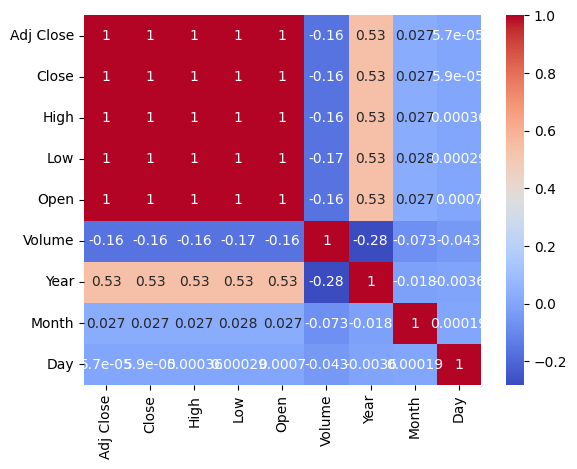

In [13]:
sns.heatmap(corr, annot=True, cmap='coolwarm',cbar=True)


<Axes: xlabel='Open', ylabel='Close'>

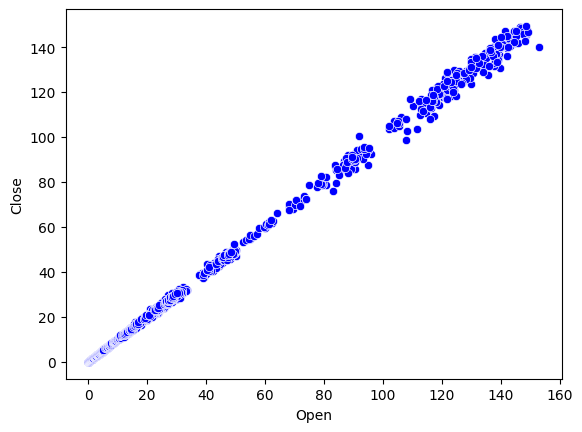

In [14]:
# Data Scaterness 
sns.scatterplot(x='Open', y='Close', data=df, color='blue')

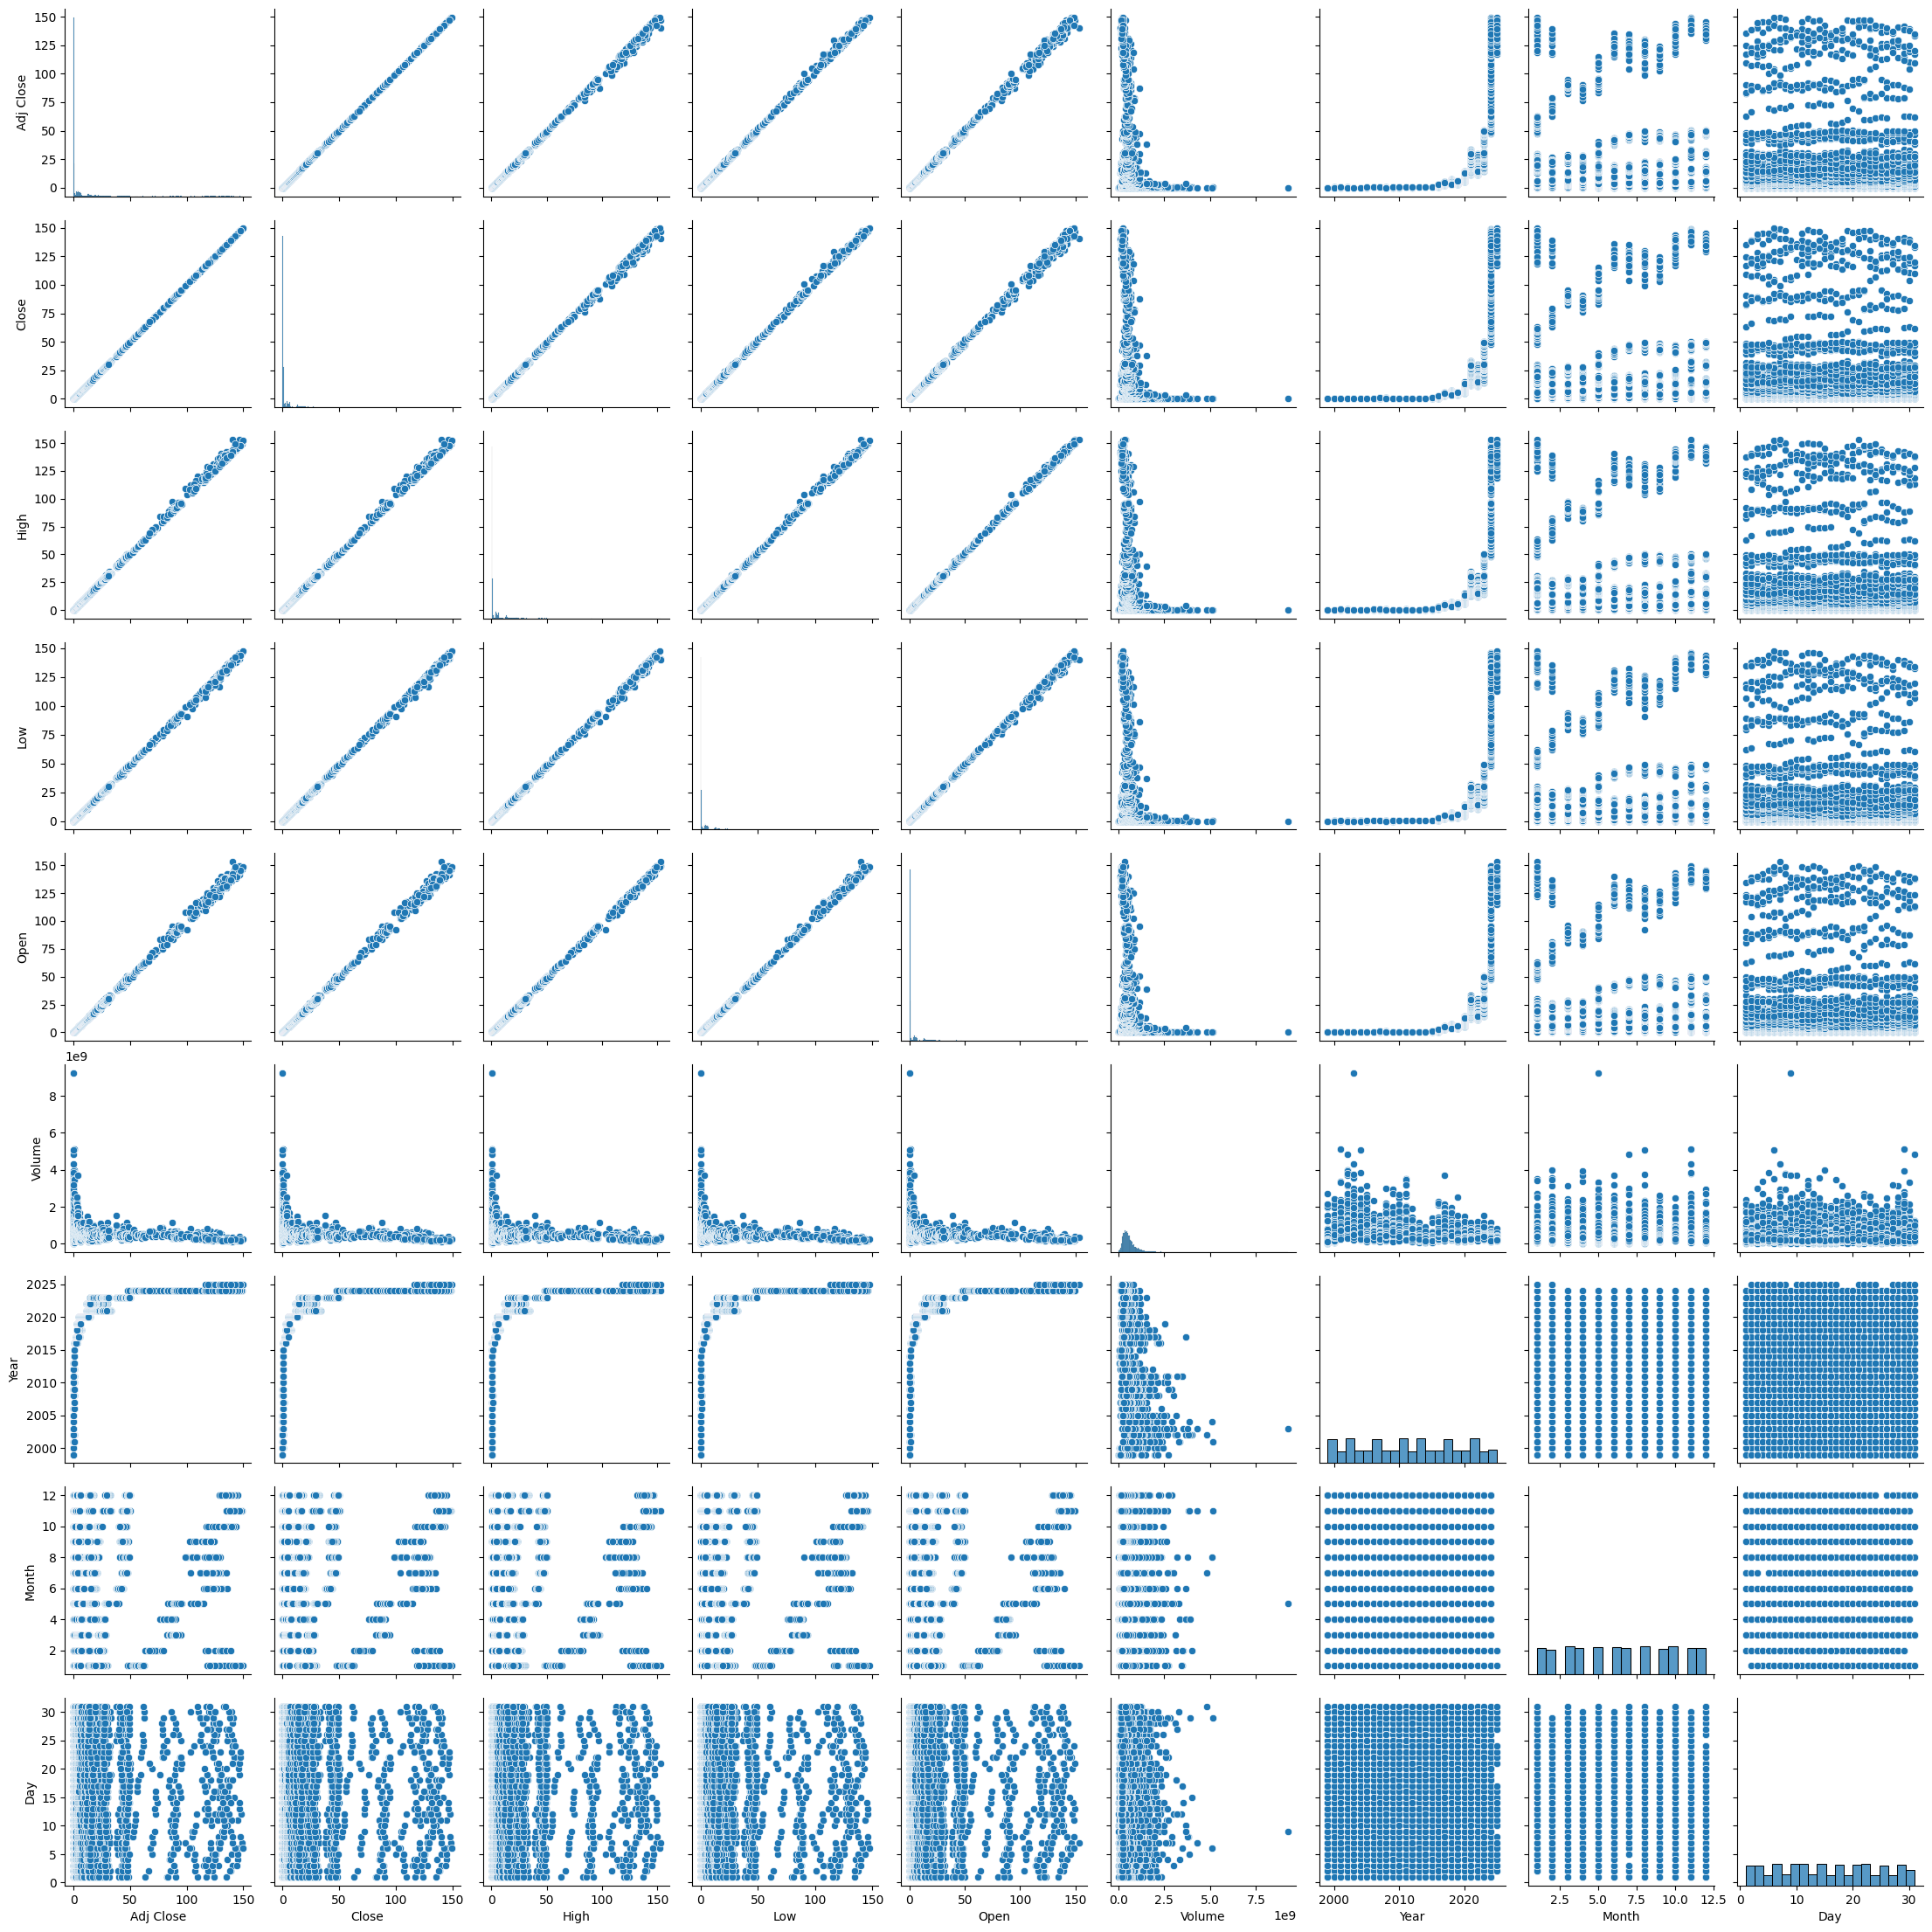

In [15]:
sns.pairplot(df)

## Data Distribution

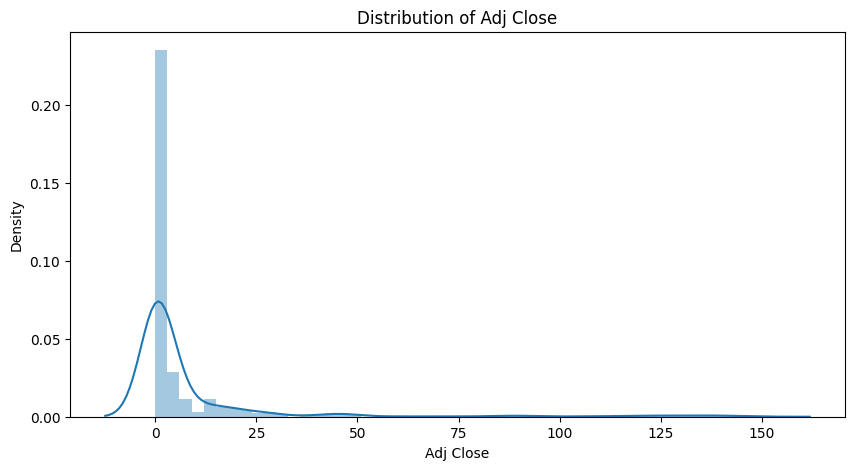

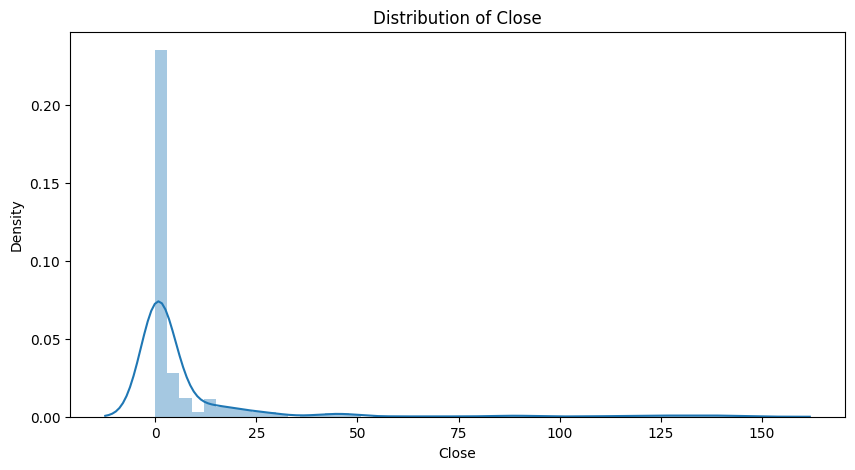

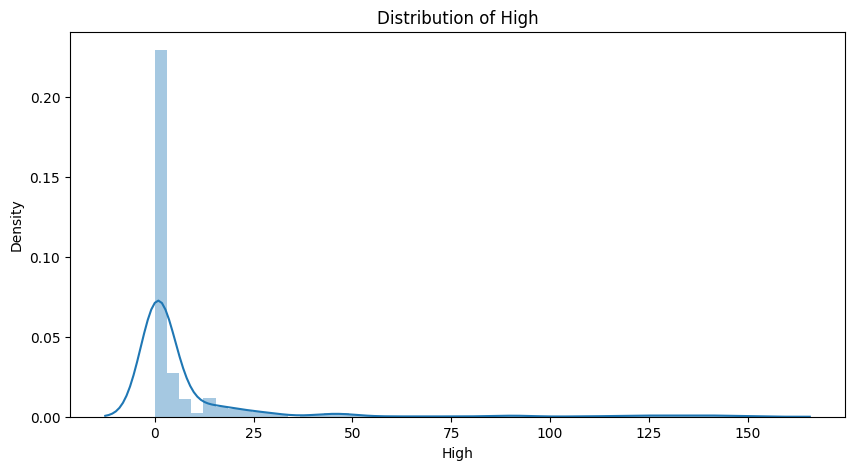

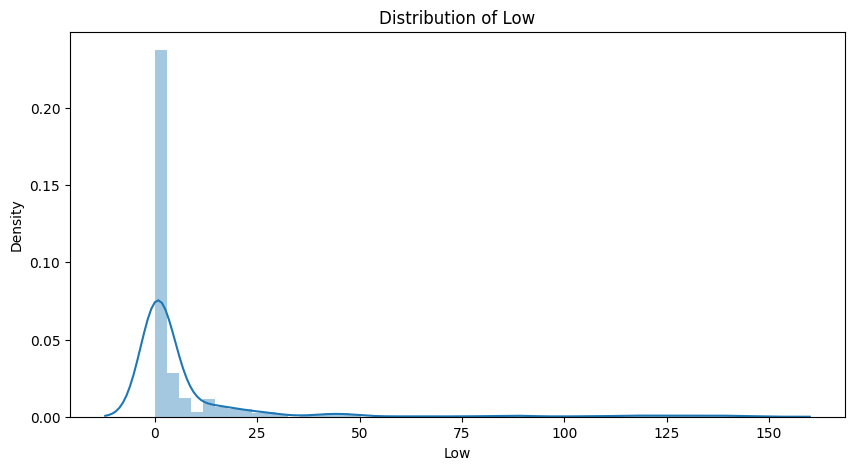

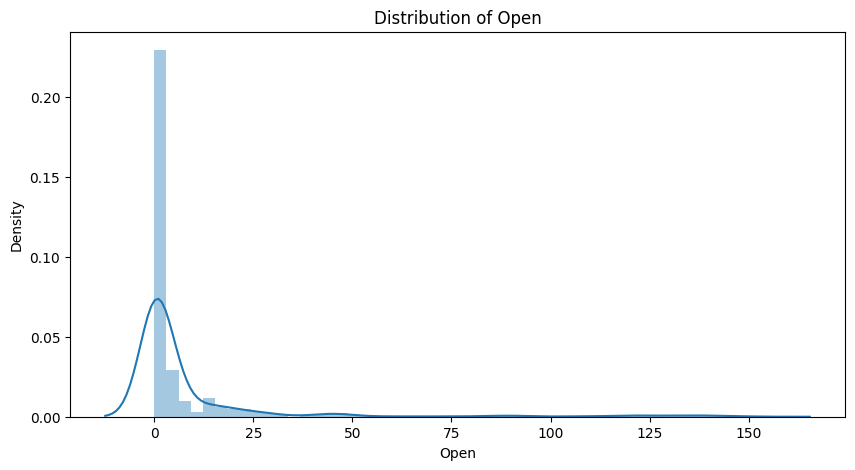

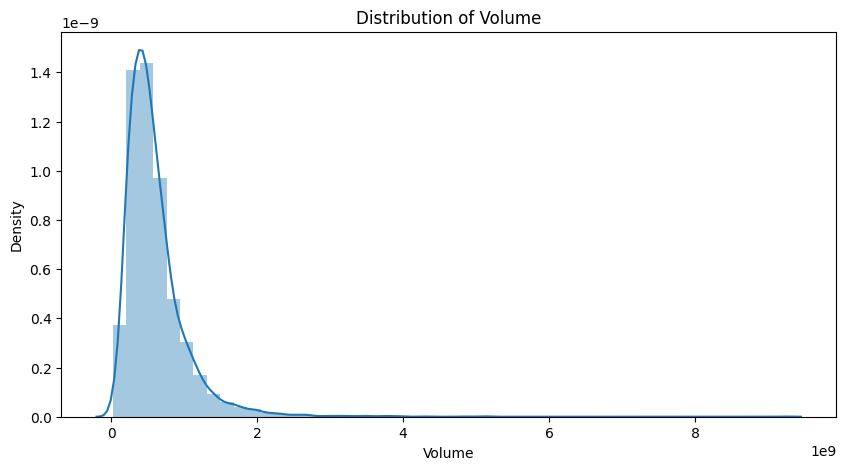

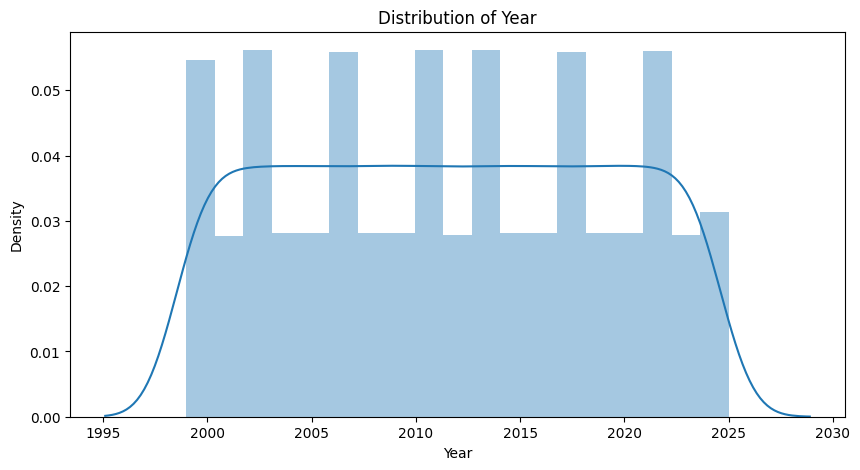

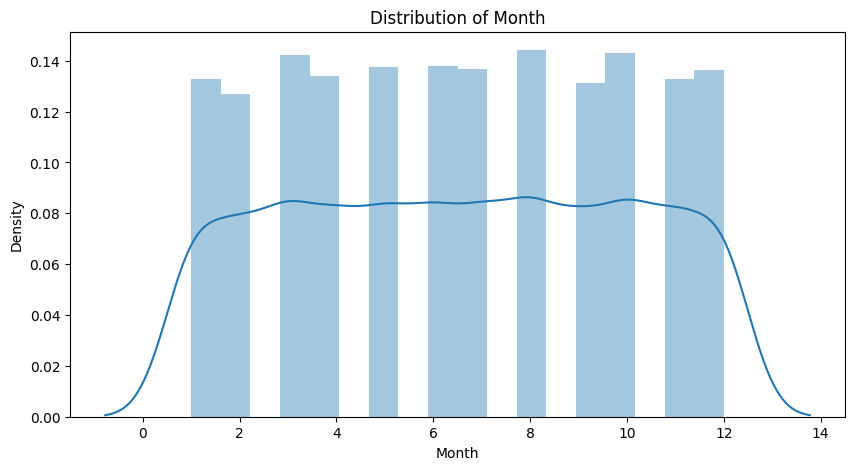

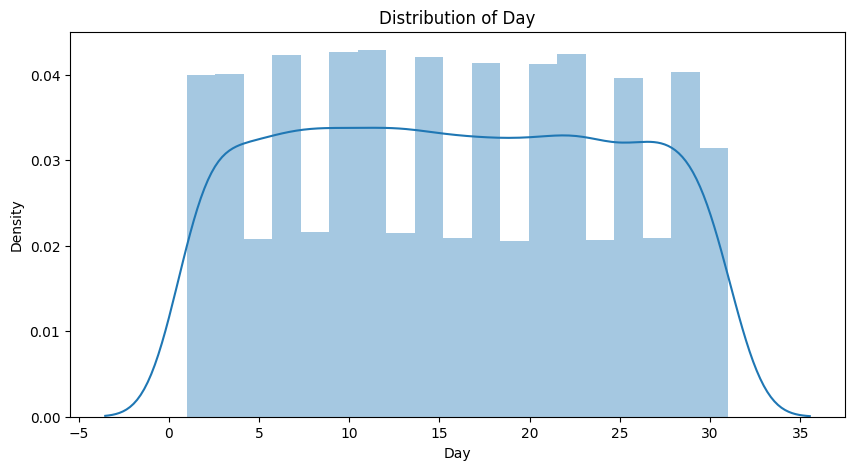

In [16]:
for i in df.columns:
    plt.figure(figsize=(10,5))
    sns.distplot(df[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

## Splitting the Data

In [17]:
# Train Test Split
x = df.drop(['Close'], axis=1)
y = df['Close']

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Normalizing The Data Using Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
x_train

array([[-0.34839594, -0.34903545, -0.34838829, ...,  0.44162777,
        -0.45044793,  1.51107729],
       [-0.17460775, -0.17681084, -0.17351669, ...,  0.97290777,
        -0.74124905, -0.89017679],
       [-0.35972446, -0.35954952, -0.35976307, ..., -0.22247224,
         1.00355764, -1.69059482],
       ...,
       [-0.16280212, -0.162984  , -0.1594661 , ...,  0.97290777,
         1.00355764,  1.51107729],
       [ 0.00823641,  0.0145431 ,  0.01224699, ...,  1.10572777,
        -0.15964682,  0.93935012],
       [-0.36411875, -0.36454225, -0.36519514, ..., -1.28503224,
        -0.15964682,  1.16804099]], shape=(5246, 8))

## Using Linear Regression 

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train )
y_predict = lr.predict(x_test)
y_predict


array([ 0.19114968,  4.37569264,  0.18732939, ..., 41.03169557,
        0.5640179 ,  4.89812797], shape=(1312,))

## Evaluation The Model

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [34]:
r2_score(y_test, y_predict)


0.9999996613301013

In [35]:
mean_squared_error(y_test, y_predict)

0.0001664777558567538

# Prediction Model System

In [25]:
def pred(Open, High, Low, Volume, Year, Month, Day,Adj_Close ):
    features = np.array([[Open, High, Low, Volume, Year, Month, Day, Adj_Close]])
    features = scaler.transform(features)
    prediction = lr.predict(features).reshape(-1, 1)
    return prediction[0]

In [26]:
Open = 200.45
High = 201.45
Low = 199.45
Volume = 100
Year = 2023
Month = 10
Day = 1
Adj_Close = 100.45

res = pred(Open, High, Low, Volume, Year, Month, Day, Adj_Close)  

In [27]:
print(res)

[198.93345367]


## Saving the Model

In [28]:
import pickle

import pickle
pickle.dump(lr, open('model.pkl', 'wb'))
